<a href="https://colab.research.google.com/github/ShubhamShelar-703/ML-AI-models/blob/main/2303889_Shubham_Shelar_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload the kaggle.json file from your local system
from google.colab import files
files.upload()

# Step 2: Create a directory for the Kaggle API credentials and move the file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Step 3: Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the IMDB dataset from Kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Step 5: Unzip the downloaded dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip


Saving kaggle (1).json to kaggle (1).json
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 19% 5.00M/25.7M [00:00<00:00, 39.7MB/s]
100% 25.7M/25.7M [00:00<00:00, 130MB/s] 
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('IMDB Dataset.csv')

# View the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic information about the dataset
print(df.info())

# Summary statistics of the dataset
print(df.describe())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
review       0
sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  posit

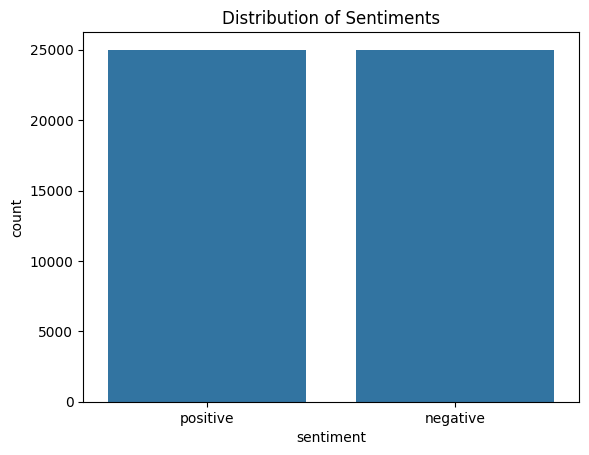

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


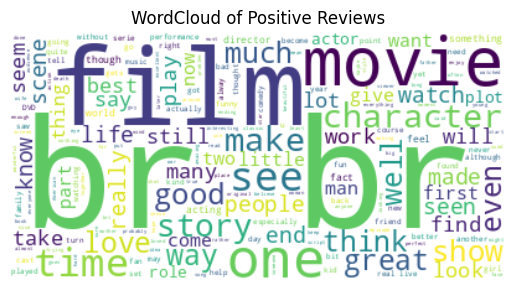

In [ ]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'].values)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(positive_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Reviews')
plt.show()


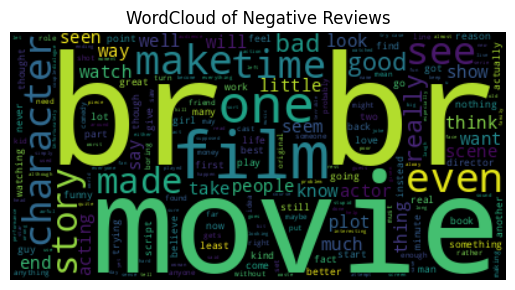

In [ ]:
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'].values)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black').generate(negative_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Reviews')
plt.show()


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
X = df['review']
y = df['sentiment']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


In [ ]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_vec, y_train)

# Predict the test set results
y_pred = model.predict(X_test_vec)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



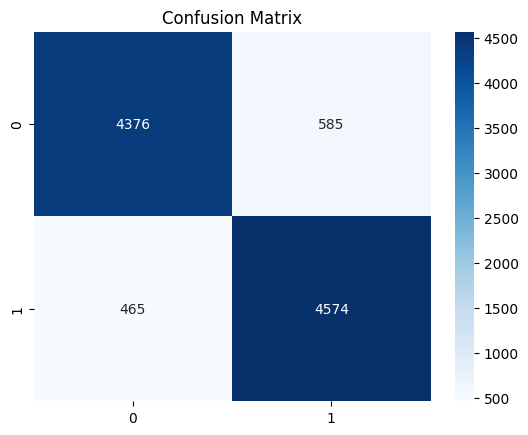

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Input statements
statements = [
    "The movie was fantastic and the actors did an excellent job.",
    "I didn't like the storyline, it was quite boring.",
    "It was an average movie with nothing special.",
    "The cinematography was beautiful but the plot was weak.",
    "Absolutely loved it! One of the best movies I've seen."
]

# Vectorize the input statements
statements_vec = vectorizer.transform(statements).toarray()

# Predict sentiments
predictions = model.predict(statements_vec)

# Map predictions to sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Positive'}
predicted_sentiments = [sentiment_labels[pred] for pred in predictions]

# Display the results
for i, statement in enumerate(statements):
    print(f"Statement: {statement}")
    print(f"Predicted Sentiment: {predicted_sentiments[i]}")
    print("-" * 50)


Statement: The movie was fantastic and the actors did an excellent job.
Predicted Sentiment: Positive
--------------------------------------------------
Statement: I didn't like the storyline, it was quite boring.
Predicted Sentiment: Negative
--------------------------------------------------
Statement: It was an average movie with nothing special.
Predicted Sentiment: Negative
--------------------------------------------------
Statement: The cinematography was beautiful but the plot was weak.
Predicted Sentiment: Negative
--------------------------------------------------
Statement: Absolutely loved it! One of the best movies I've seen.
Predicted Sentiment: Positive
--------------------------------------------------
